In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 

In [88]:
# นำเข้าข้อมูลจากไฟล์ชื่อ Data Change.csv 
url = 'https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/Data%20Change.csv'
df=pd.read_csv(url)
df.sample(20) 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
7523,458996,Female,1,71,0,Artist,1,0,1,Cat_6,A
1729,464887,Male,1,49,1,Artist,1,1,8,Cat_4,C
4638,459314,Male,1,46,1,Artist,11,1,4,Cat_6,C
1805,461729,Female,1,41,1,Marketing,0,0,3,Cat_6,D
5151,459094,Female,0,31,0,Healthcare,1,0,5,Cat_6,C
3551,461138,Male,1,63,1,Entertainment,1,2,2,Cat_7,B
909,463047,Male,1,27,1,Homemaker,9,0,6,Cat_6,D
7040,465560,Male,1,60,1,Entertainment,1,1,5,Cat_3,B
7372,463611,Male,0,62,1,Artist,0,0,6,Cat_6,A
6785,466337,Female,1,41,0,Engineer,0,0,2,Cat_4,A


In [89]:
#ดูภาพรวมข้อมูล
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       8068 non-null int64
Age                8068 non-null int64
Graduated          8068 non-null int64
Profession         8068 non-null object
Work_Experience    8068 non-null int64
Spending_Score     8068 non-null int64
Family_Size        8068 non-null int64
Var_1              8068 non-null object
Segmentation       8068 non-null object
dtypes: int64(7), object(4)
memory usage: 693.4+ KB


In [90]:
# เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล
df.columns

Index([u'ID', u'Gender', u'Ever_Married', u'Age', u'Graduated', u'Profession',
       u'Work_Experience', u'Spending_Score', u'Family_Size', u'Var_1',
       u'Segmentation'],
      dtype='object')

In [91]:
#บอกค่าที่หายไปในแต่ละcolumn
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

<Figure size 720x360 with 0 Axes>

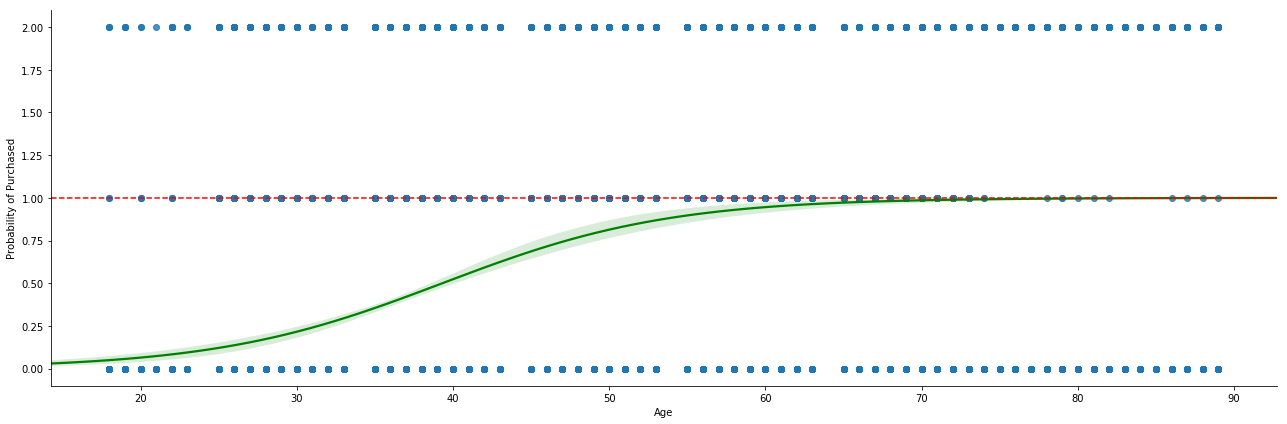

In [93]:
plt.figure(figsize=(10, 5))
sns.lmplot(x='Age', y='Spending_Score', data=df,
           logistic=True, height=6, aspect=3, 
           line_kws={'color': 'green'})
plt.ylabel('Probability of Purchased')
plt.axhline(1, color='red', linestyle='--');

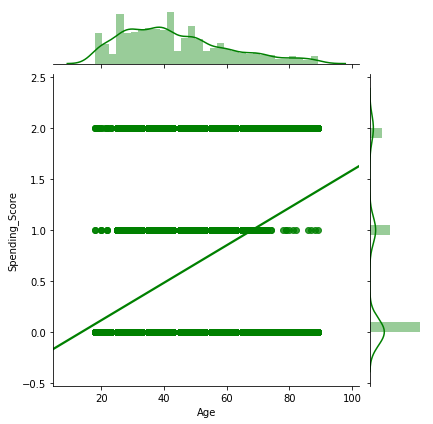

In [94]:
# โดยการใช้ seaborn ทำให้สามารถดูการกระจายตัวของข้อมูล (histogram) ในเเนวเเกน x เเละ y ได้ดังนี้
sns.jointplot(x='Age', y='Spending_Score', data=df, kind='reg', ci=None,
              color='green');

In [95]:
# สร้าง Logistic Regression model โดยใช้ library ของ scikit learn
# นำเข้าคลาสของ Logistic Regression จาก scikit learn โดย
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# เเบ่งข้อมูลออกเป็นชุดเรียนรู้เเละชุดทดสอบโดยกำหนดให้ชุดทดสอบมีขนาดเป็น 30% ของข้อมูล
# X=df[['Age']]
X=df[['Age']]
y=df['Spending_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [96]:
X_train

,Age
901,30
5606,37
5222,29
2966,46
4833,28
3364,75
2264,27
7268,43
1691,62
6648,43


In [97]:
model = LogisticRegression() # สร้าง object ชื่อ model จาก class ของ LogisticRegression class 
model.fit(X_train, y_train)  # สร้าง model LogisticRegression จากข้อมูล X เเละ Y

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
# ทดลองเเสดงค่า intercept ( θ0 ) เเละ coefficient ( θ1 )

In [99]:
# intercept 
print('intercept = {model.intercept_}') 
# coefficient
print('coefficient = {model.coef_}') 

intercept = {model.intercept_}
coefficient = {model.coef_}


In [100]:
# ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า  R2
model.score(X_train, y_train) # accuracy of the model

0.6187356118292899

In [101]:
# model.score(X_test, y_test) # accuracy of the model

In [102]:
# K-fold cross validation

In [103]:
from sklearn.model_selection import KFold, cross_val_score
# from sklearn.model_selection import cross_val_score
from numpy import mean, std
# from numpy import std

In [107]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.619 (0.009)


In [108]:
scores 

array([0.60530973, 0.61327434, 0.63064659, 0.62178919, 0.62178919])

In [109]:
# ทดลองการทำนายค่าโดยทำได้ดังนี้

In [110]:
predicted = model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_pred,y_true
2142,0,2
7235,0,1
5214,0,1
6123,0,2
1175,0,1
6088,0,1
5012,0,2
197,0,2
210,2,0
765,2,0


In [112]:
len(dx[dx.y_true != dx.y_pred])

980

In [113]:
dx[dx.y_true == dx.y_pred]

,y_pred,y_true
6295,0,0
5347,0,0
2241,0,0
1254,0,0
6703,0,0
3626,2,2
3924,0,0
7579,0,0
3179,0,0
1167,0,0


In [114]:
# วัดประสิทธิภาพด้วย Confusion matrix

In [115]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print('true negative = {tn}')
print('false positive = {fp}')
print('false negative = {fn}')
print('true positive = {tp}')

ValueError: too many values to unpack

In [116]:
print('accuracy = {metrics.accuracy_score(y_test, predicted)}')
print('precision = {metrics.precision_score(y_test, predicted)}')
print('recall = {metrics.recall_score(y_test, predicted)}')

accuracy = {metrics.accuracy_score(y_test, predicted)}
precision = {metrics.precision_score(y_test, predicted)}
recall = {metrics.recall_score(y_test, predicted)}


In [117]:
# Multiple Logistic Regression

In [118]:
df=pd.read_csv(url, usecols=list(range(2, 5)))
df.head()

,Ever_Married,Age,Graduated
0,0,22,0
1,1,38,1
2,1,67,1
3,1,67,1
4,1,40,1


In [119]:
# ทดลองดูความสัมพันธ์ระหว่างคุณลักษณะ

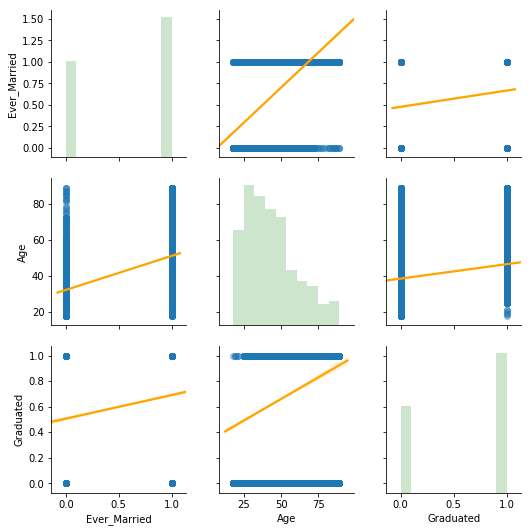

In [120]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [121]:
# สร้าง multiple logistic regression model
X = df.drop(columns=['Age'])
y = df['Age']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [122]:
X

,Ever_Married,Graduated
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,0,1
7,0,1
8,1,1
9,1,1


In [123]:
mplo = LogisticRegression() 
mplo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
# ทดลองเเสดงค่า intercept คือ  θ0 ,  θ1  และ  θ2
# intercept 
print('intercept = {mplo.intercept_}') # theta0
# coefficient
print('coefficient = {mplo.coef_}') # theta1 theta2 theta3

intercept = {mplo.intercept_}
coefficient = {mplo.coef_}


In [127]:
# ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า  R2
R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
R_squared_error_training = R_squred_train
print(R_squared_error_training)

0.050821196157421755


In [129]:
 R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
 print(R_squred_train) 
 R_squred = mplo.score(X_test, y_test) 
 print(R_squred) 

0.050821196157421755
0.03717472118959108


In [130]:
# Cross valiation

In [131]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(mplo, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.045 (0.004)


In [132]:
# ทดลองทำนายผลลัพธ์
predicted = mplo.predict(X_test)
predicted 

array([35, 35, 18, ..., 47, 18, 35], dtype=int64)

In [133]:
predicted = mplo.predict(X_test)
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_pred,y_true
6971,35,36
4165,35,42
4340,18,33
583,18,33
1907,35,46
5406,27,30
4303,47,88
5006,18,19
400,18,25
1680,35,65


In [134]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print('true negative = {tn}')
print('false positive = {fp}')
print('false negative = {fn}')
print('true positive = {tp}')

ValueError: too many values to unpack

In [135]:
accuracy = metrics.accuracy_score(y_test, predicted)
print(accuracy)
precision = metrics.precision_score(y_test, predicted)
print(precision)
recall = metrics.recall_score(y_test, predicted)
print(recall)

0.03717472118959108


ValueError: Target is multiclass but average='binary'. Please choose another average setting.